<a href="https://colab.research.google.com/github/uzeziogho/Mall-Customer-Segmentation-Data/blob/main/Mall_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the "Gender" column
data['Gender'] = label_encoder.fit_transform(data['Gender'])

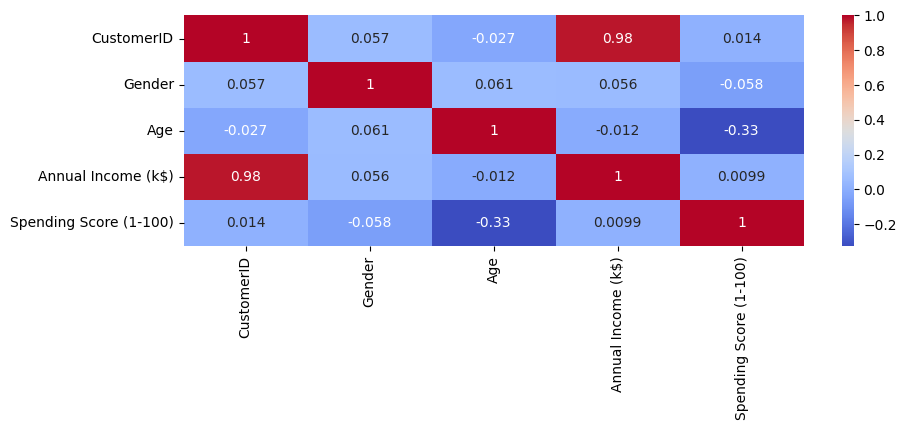

In [8]:
# Select the 31 features for analysis
features = ['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']

df = pd.DataFrame(data)

# calculate the correlation matrix
corr_matrix = df[features].corr(method='pearson')

# plot the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 3)) # set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax) # plot the heatmap
plt.show() # show the plot

In [12]:
# Check the column names in your dataset
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [13]:
# Select the features for clustering (Annual Income and Spending Score)
X = data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

In [14]:
# Find the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

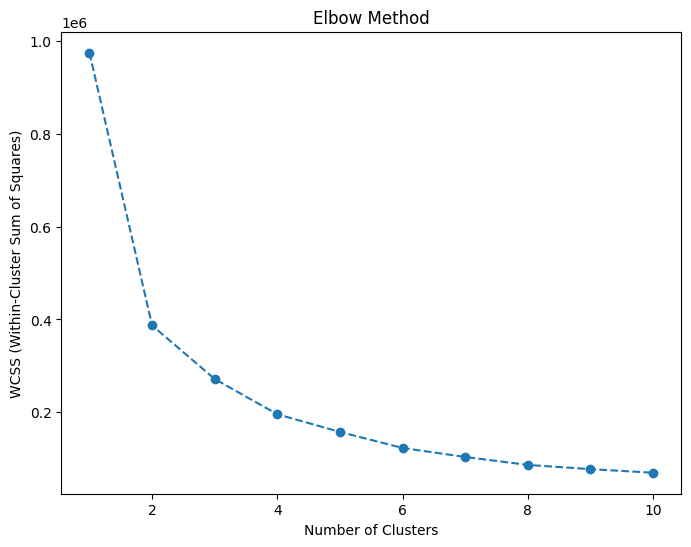

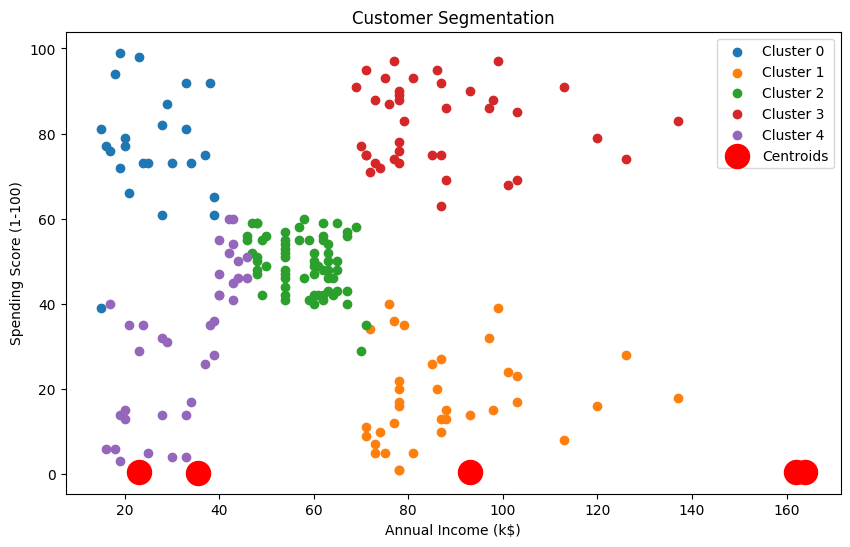

In [16]:
# Plot the Elbow method to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow method, choose an appropriate number of clusters (e.g., 5)
optimal_clusters = 5

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Add the cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    plt.scatter(X[data['Cluster'] == i]['Annual Income (k$)'], X[data['Cluster'] == i]['Spending Score (1-100)'], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


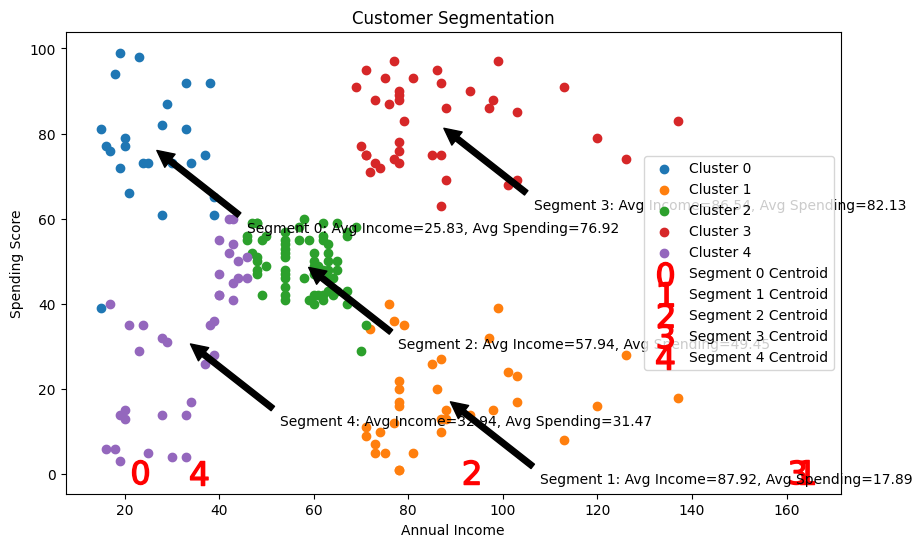

In [20]:
# ... (previous code)

# Visualize the clusters and add segment interpretation
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    plt.scatter(X[data['Cluster'] == i]['Annual Income (k$)'], X[data['Cluster'] == i]['Spending Score (1-100)'], label=f'Cluster {i}')

# Plot the centroids and add segment interpretation
for i, centroid in enumerate(kmeans.cluster_centers_):
    plt.scatter(centroid[0], centroid[1], s=300, c='red', marker=f'${i}$', label=f'Segment {i} Centroid')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

# Segment Interpretation
for i in range(optimal_clusters):
    segment_data = data[data['Cluster'] == i]
    avg_income = segment_data['Annual Income (k$)'].mean()
    avg_spending = segment_data['Spending Score (1-100)'].mean()
    plt.annotate(f'Segment {i}: Avg Income={avg_income:.2f}, Avg Spending={avg_spending:.2f}',
                 xy=(avg_income, avg_spending), xytext=(avg_income + 20, avg_spending - 20),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()
